In [1]:
#import libraries required for analysis
from change_detection import functions as chg
from change_detection import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ebmdatalab import bq
from ebmdatalab import charts
from ebmdatalab import maps
from lib.outliers import *  #This is copied into the local folder from a branch ebmdatalab pandas library - it will be placed in its own repo to install at a later dat

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/zoo_1.8-7.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 861309 bytes (841 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

Installed ['zoo', 'caTools', 'gets']


In [2]:
opioids_class = chg.ChangeDetection('ccg_data_opioid%',
                                    measure=True,
                                    direction='down',
                                    overwrite=False,
                                    verbose=False,
                                    draw_figures='yes')
opioids_class.run()

Downloading: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 22.47rows/s]


In [3]:
opioids = opioids_class.concatenate_outputs()
opioids

is.nbreak  is.tfirst  is.tfirst.pknown  \
measure                 name                                           
ccg_data_opioidome      00C   0         NaN        NaN                 
                        00D   0         NaN        NaN                 
                        00J   0         NaN        NaN                 
                        00K   0         NaN        NaN                 
                        00L   0         NaN        NaN                 
...                          ..          ..         ..                 
ccg_data_opioidspercent 99H   1          4.0        4.0                
                        99J   4          9.0        9.0                
                        99K   0         NaN        NaN                 
                        99M   4          5.0        5.0                
                        99N   5          16.0       16.0               

                              is.tfirst.pknown.offs  is.tfirst.offs  \
measure                 name                                          
ccg_data_opioidome      00C  NaN                    NaN               
                        00D  NaN                    NaN               
                        00J  NaN                    NaN               
                        00K  NaN                    NaN               
                        00L  NaN                    NaN               
...                           ..                     ..               
ccg_data_opioidspercent 99H   4.0                    4.0              
                        99J   9.0                    9.0              
                        99K  NaN                    NaN               
                        99M   5.0                    5.0              
                        99N   43.0                   43.0             

                              is.tfirst.big  is.slope.ma  is.slope.ma.prop  \
measure                 name                                                 
ccg_data_opioidome      00C  NaN            NaN          NaN                 
                        00D  NaN            NaN          NaN                 
                        00J  NaN            NaN          NaN                 
                        00K  NaN            NaN          NaN                 
                        00L  NaN            NaN          NaN                 
...                           ..             ..           ..                 
ccg_data_opioidspercent 99H   4.0           -0.001047    -0.006315           
                        99J   34.0          -0.001305    -0.008698           
                        99K  NaN            NaN          NaN                 
                        99M   37.0          -0.001525    -0.006083           
                        99N   43.0          -0.005402    -0.033969           

                              is.slope.ma.prop.lev  is.intlev.initlev  \
measure                 name                                            
ccg_data_opioidome      00C  NaN                   NaN                  
                        00D  NaN                   NaN                  
                        00J  NaN                   NaN                  
                        00K  NaN                   NaN                  
                        00L  NaN                   NaN                  
...                           ..                    ..                  
ccg_data_opioidspercent 99H   0.517241              0.166779            
                        99J   0.526120              0.151591            
                        99K  NaN                   NaN                  
                        99M   0.502489              0.252457            
                        99N   0.505883              0.159380            

                              is.intlev.finallev  is.intlev.levd  \
measure                 name                                       
ccg_data_opioidome      00C  NaN                 NaN               


In [4]:
opioids = opioids.reset_index()
opioids.head()

,measure,name,is.nbreak,is.tfirst,is.tfirst.pknown,is.tfirst.pknown.offs,is.tfirst.offs,is.tfirst.big,is.slope.ma,is.slope.ma.prop,is.slope.ma.prop.lev,is.intlev.initlev,is.intlev.finallev,is.intlev.levd,is.intlev.levdprop
0,ccg_data_opioidome,00C,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ccg_data_opioidome,00D,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ccg_data_opioidome,00J,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ccg_data_opioidome,00K,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ccg_data_opioidome,00L,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
ccg_data_opioidome = opioids.loc[(opioids["measure"] == "ccg_data_opioidome")]

In [6]:
ccg_data_opioidspercent = opioids.loc[(opioids["measure"] == "ccg_data_opioidspercent")]

In [7]:
ccg_data_opioidper1000 = opioids.loc[(opioids["measure"] == "ccg_data_opioidper1000")]
ccg_data_opioidper1000.head()

,measure,name,is.nbreak,is.tfirst,is.tfirst.pknown,is.tfirst.pknown.offs,is.tfirst.offs,is.tfirst.big,is.slope.ma,is.slope.ma.prop,is.slope.ma.prop.lev,is.intlev.initlev,is.intlev.finallev,is.intlev.levd,is.intlev.levdprop
191,ccg_data_opioidper1000,00C,2,35.0,35.0,35.0,35.0,35.0,-0.033010,-0.008579,0.538462,3.880954,3.022690,0.858264,0.221148
192,ccg_data_opioidper1000,00D,2,31.0,31.0,31.0,31.0,31.0,-0.013650,-0.003509,0.533333,3.903490,3.493978,0.409512,0.104909
193,ccg_data_opioidper1000,00J,1,49.0,49.0,49.0,49.0,49.0,-0.035633,-0.014250,0.583333,2.536202,2.108601,0.427602,0.168599
194,ccg_data_opioidper1000,00K,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,ccg_data_opioidper1000,00L,2,35.0,35.0,35.0,35.0,35.0,-0.027819,-0.008233,0.538462,3.406605,2.683307,0.723298,0.212322


## Total OME

In [8]:
data = pd.read_csv('data/ccg_data_opioid/ccg_data_opioidome/bq_cache.csv',index_col='code')
data['rate'] = data['numerator'] / data['denominator']
data = data.sort_values('month')

# is.slope.ma Average slope over steepest segment contributing at least XX% of total drop is.slope.ma
omeisslopema = ccg_data_opioidome.sort_values("is.slope.ma", ascending=False).head(5)
omeisslopema = omeisslopema.set_index('name')

#is.slope.ma.prop Average slope as proportion to prior level
omeisslopemaprop = ccg_data_opioidome.sort_values("is.slope.ma.prop", ascending=False).head(5)
omeisslopeamprop = omeisslopemaprop.set_index('name')


#is.intlev.levdprop Percentage of the total drop the segment used to evaluate the slope makes up
omeintlevlevprop = ccg_data_opioidome.sort_values("is.intlev.levdprop", ascending=False).head(5) 
omeintlevlevprop = omeintlevlevprop.set_index('name')

In [9]:
data.loc['06F',['month','rate']]

,month,rate
code,,
06F,2014-11-01,27524.665751
06F,2014-12-01,32275.789622
06F,2015-01-01,29101.733846
06F,2015-02-01,27577.771800
06F,2015-03-01,29940.854183
06F,2015-04-01,28765.582505
06F,2015-05-01,29544.966673
06F,2015-06-01,29998.159435
06F,2015-07-01,30684.640652


,is.tfirst.big,is.intlev.levdprop,plots
name,,,
06F,15.0,0.097050,
08D,10.0,0.110259,
07M,13.0,0.106182,
08X,13.0,0.110499,
05L,15.0,0.109295,

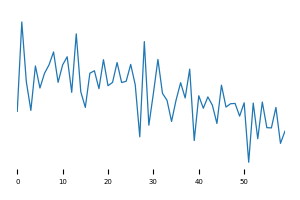
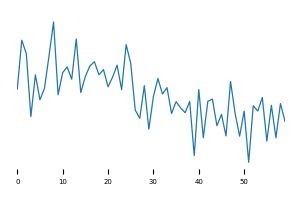
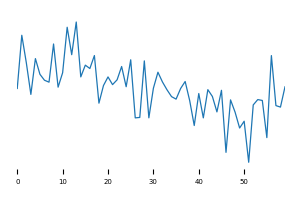
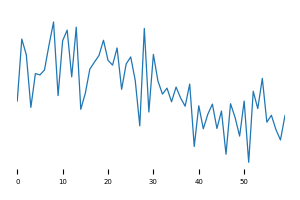
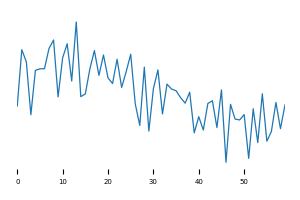

In [10]:
ser = sparkline_table(data, 'rate', subset=omeisslopeamprop.index)
ser
omeisslopeamprop[["is.tfirst.big","is.intlev.levdprop"]].join(ser)

,is.tfirst.big,is.slope.ma.prop,plots
name,,,
06F,15.0,-0.002114,
08D,10.0,-0.002167,
07M,13.0,-0.002217,
08X,13.0,-0.002307,
05L,15.0,-0.002382,

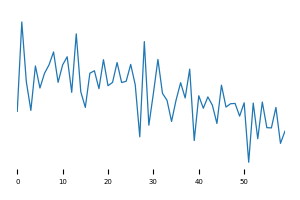
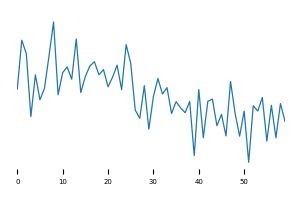
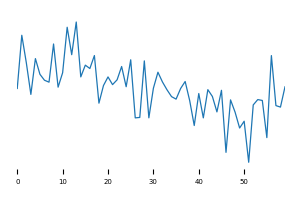
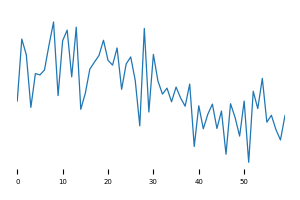
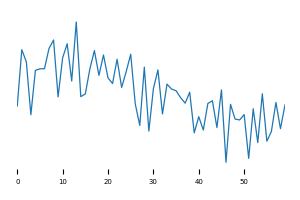

In [11]:
ser = sparkline_table(data, 'rate', subset=omeisslopeamprop.index)
ser
omeisslopeamprop[["is.tfirst.big","is.slope.ma.prop"]].join(ser)

,is.tfirst.big,is.slope.ma,plots
name,,,
08X,13.0,-22.193904,
08D,10.0,-27.536740,
07M,13.0,-35.472013,
07V,27.0,-40.471029,
08J,10.0,-40.740809,

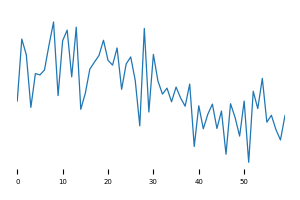
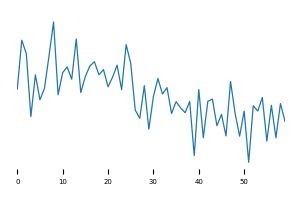
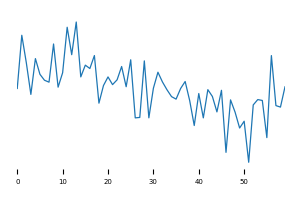
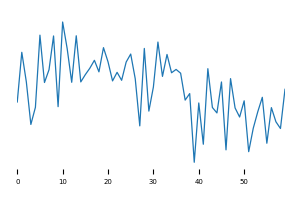
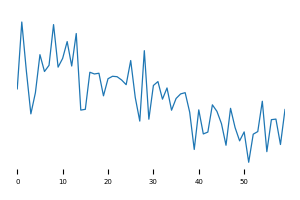

In [12]:
ser = sparkline_table(data, 'rate', subset=omeisslopema.index)
ser
omeisslopema [["is.tfirst.big","is.slope.ma"]].join(ser)

## ccg_data_opioidspercent

[High dose opioids as percentage regular opioids](https://openprescribing.net/measure/opioidspercent/)  

In [15]:
data = pd.read_csv('data/ccg_data_opioid/ccg_data_opioidspercent/bq_cache.csv',index_col='code')
data['rate'] = data['numerator'] / data['denominator']
data = data.sort_values('month')

#Average slope over steepest segment contributing at least XX% of total drop is.slope.ma
highdoseisslopema = ccg_data_opioidspercent.sort_values("is.slope.ma", ascending=False).head(5)
highdoseisslopema = highdoseisslopema.set_index('name')

#is.slope.ma.prop Average slope as proportion to prior level
highdoseisslopemaprop = ccg_data_opioidspercent.sort_values("is.slope.ma.prop", ascending=False).head(5)
highdoseisslopeamprop = highdoseisslopemaprop.set_index('name')

#is.intlev.levdprop Percentage of the total drop the segment used to evaluate the slope makes up
highdoseintlevlevprop = ccg_data_opioidspercent.sort_values("is.intlev.levdprop", ascending=False).head(5) 
highdoseintlevlevprop = highdoseintlevlevprop.set_index('name')

,is.tfirst.big,is.slope.ma,plots
name,,,
00Q,18.0,-0.000198,
09W,5.0,-0.000241,
06N,4.0,-0.000275,
02Y,13.0,-0.000309,
10A,5.0,-0.000350,

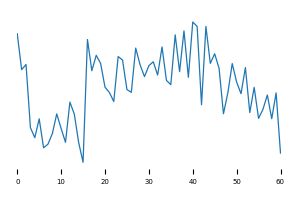
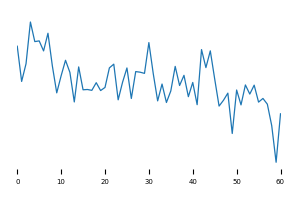
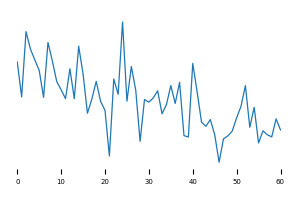
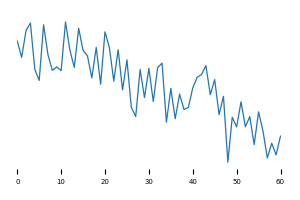
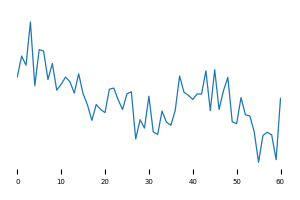

In [16]:
ser = sparkline_table(data, 'rate', subset=highdoseisslopema.index)
ser
highdoseisslopema[["is.tfirst.big","is.slope.ma"]].join(ser)

,is.tfirst.big,is.slope.ma.prop,plots
name,,,
00Q,18.0,-0.000928,
09W,5.0,-0.001394,
06N,4.0,-0.001506,
02Y,13.0,-0.001522,
04G,25.0,-0.001598,

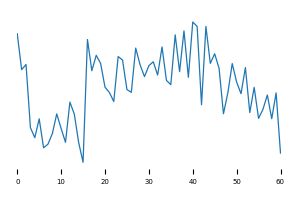
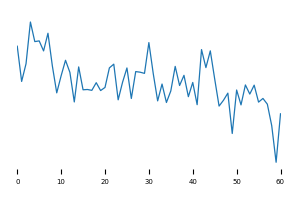
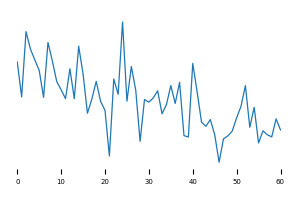
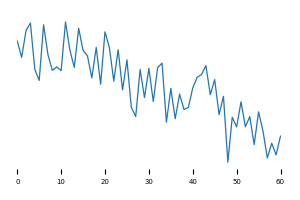
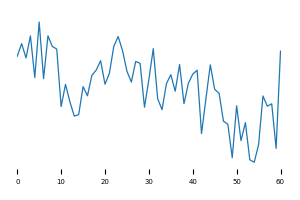

In [17]:
ser = sparkline_table(data, 'rate', subset=highdoseisslopeamprop.index)
ser
highdoseisslopeamprop[["is.tfirst.big","is.slope.ma.prop"]].join(ser)

,is.tfirst.big,is.intlev.levdprop,plots
name,,,
00Q,18.0,0.040773,
09W,5.0,0.079373,
06N,4.0,0.087199,
02Y,13.0,0.074483,
10A,5.0,0.125755,

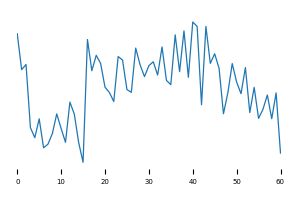
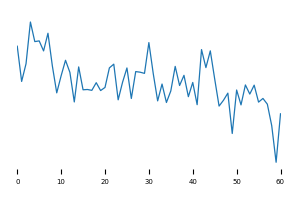
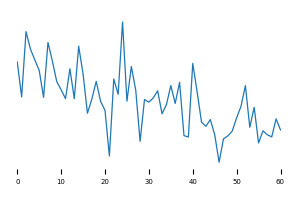
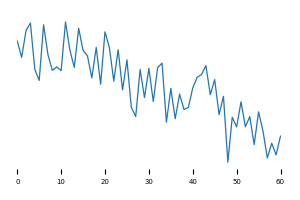
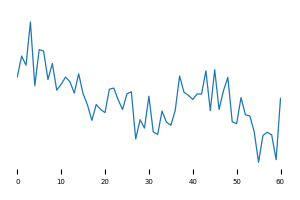

In [18]:
ser = sparkline_table(data, 'rate', subset=highdoseisslopema.index)
ser
highdoseisslopema[["is.tfirst.big","is.intlev.levdprop"]].join(ser)

## High dose opioids per 1000 patients

[High dose opioids per 1000 patients](https://openprescribing.net/measure/opioidper1000/)

In [19]:
data = pd.read_csv('data/ccg_data_opioid/ccg_data_opioidper1000/bq_cache.csv',index_col='code')
data['rate'] = data['numerator'] / data['denominator']
data = data.sort_values('month')

#Average slope over steepest segment contributing at least XX% of total drop is.slope.ma
higdoseistsizeisslopema = ccg_data_opioidome.sort_values("is.slope.ma", ascending=False).head(5)
higdoseistsizeisslopema = higdoseistsizeisslopema.set_index('name')

#is.slope.ma.prop Average slope as proportion to prior level
higdoseistsizeisslopemaprop = ccg_data_opioidome.sort_values("is.slope.ma.prop", ascending=False).head(5)
higdoseistsizeisslopeamprop = higdoseistsizeisslopemaprop.set_index('name')

#is.intlev.levdprop Percentage of the total drop the segment used to evaluate the slope makes up
higdoseistsizeintlevlevprop = ccg_data_opioidome.sort_values("is.intlev.levdprop", ascending=False).head(5) 
higdoseistsizeintlevlevprop = higdoseistsizeintlevlevprop.set_index('name')


,is.tfirst.big,is.intlev.levdprop,plots
name,,,
08C,27.0,0.327867,
02D,12.0,0.305159,
06M,27.0,0.263200,
01D,33.0,0.256618,
09D,27.0,0.254256,

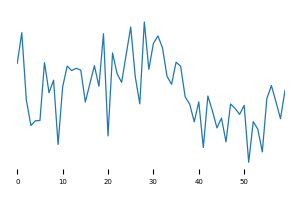
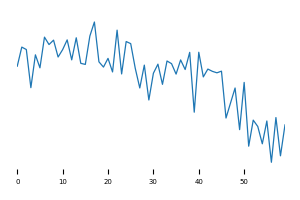
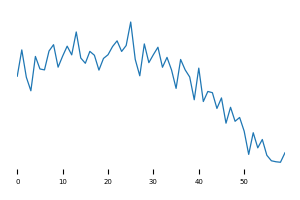
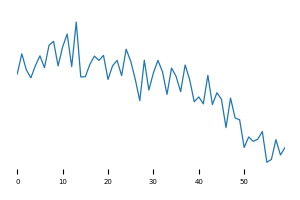
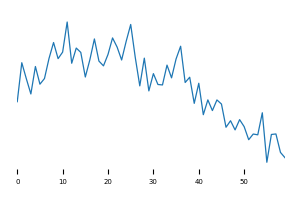

In [20]:
ser = sparkline_table(data, 'rate', subset=higdoseistsizeintlevlevprop.index)
ser
higdoseistsizeintlevlevprop[["is.tfirst.big","is.intlev.levdprop"]].join(ser)

,is.tfirst.big,is.slope.ma.prop,plots
name,,,
06F,15.0,-0.002114,
08D,10.0,-0.002167,
07M,13.0,-0.002217,
08X,13.0,-0.002307,
05L,15.0,-0.002382,

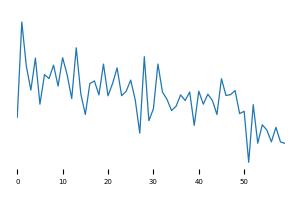
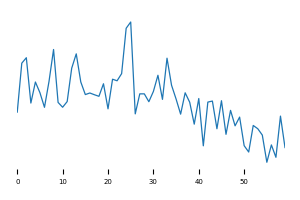
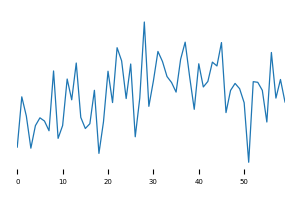
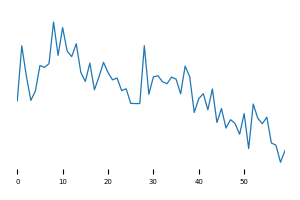
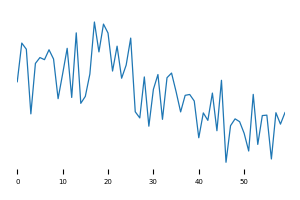

In [21]:
ser = sparkline_table(data, 'rate', subset=higdoseistsizeisslopeamprop.index)
ser
higdoseistsizeisslopeamprop[["is.tfirst.big","is.slope.ma.prop"]].join(ser)

,is.tfirst.big,is.slope.ma,plots
name,,,
08X,13.0,-22.193904,
08D,10.0,-27.536740,
07M,13.0,-35.472013,
07V,27.0,-40.471029,
08J,10.0,-40.740809,

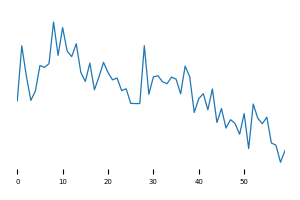
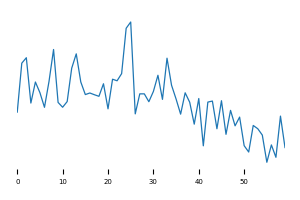
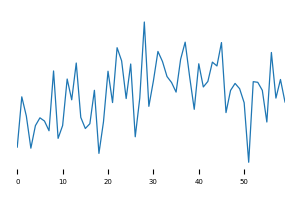
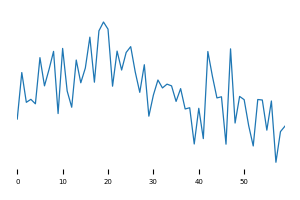
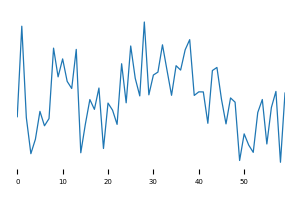

In [22]:
ser = sparkline_table(data, 'rate', subset=higdoseistsizeisslopema.index)
ser
higdoseistsizeisslopema[["is.tfirst.big","is.slope.ma"]].join(ser)